# Objectives
* The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

* The client is interested in predicting the house sale price from her four inherited houses and any other house in Ames, Iowa.

## Change working directory
We need to change the working directory from its current folder to its parent folder

  * We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'C:\\Users\\issam\\Housing-market-analysis.1\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory

    * os.path.dirname() gets the parent directory
    * os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'C:\\Users\\issam\\Housing-market-analysis.1'

# Import packages

In [4]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder

# Load Dataset

In [5]:
# Load dataset
df = pd.read_csv(r"C:\Users\issam\Housing-market-analysis.1\inputs\housing-prices-data\house_prices_records.csv")
df = df.sample(frac=0.2, random_state=101) # inputs/housing-prices-data/house_prices_records.csv
print(df.shape)
print(df.head(5)) 

#X = df.drop(columns=['SalePrice'])  # Extract features
#y = df['SalePrice']  # Extract target variable

#print(df.columns)
df = df.fillna(0)
df.info()


(292, 24)
      1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
1054      1091     898.0           3.0           Mn         932          GLQ   
361        988     517.0           3.0           No         399          Rec   
1282      1040       0.0           3.0           Mn         532          LwQ   
161       1572    1096.0           3.0           Av        1016          GLQ   
515       2020       0.0           3.0           No        1436          GLQ   

      BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
1054        133            NaN         586          Fin  ...         90.0   
361         484            NaN         240          NaN  ...          NaN   
1282        364            NaN         484          Unf  ...         61.0   
161         556            NaN         726          Fin  ...        110.0   
515         570            NaN         900          Fin  ...         94.0   

      MasVnrArea OpenPorchSF  OverallCond  Ove

---

# Data Exploration

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Study

* Used OneHotEncoder to transform categorical variables into a format that can be provided to machine learning algorithms.

In [7]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(6)

(292, 40)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_ALQ,BsmtFinType1_0,GarageFinish_Fin,GarageFinish_0,GarageFinish_Unf,GarageFinish_RFn,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
1054,1091,898.0,3.0,932,133,0.0,586,2002.0,1989,11367,...,0,0,1,0,0,0,1,0,0,0
361,988,517.0,3.0,399,484,0.0,240,1940.0,1505,9144,...,0,0,0,1,0,0,0,1,0,0
1282,1040,0.0,3.0,532,364,0.0,484,1977.0,1040,8800,...,0,0,0,0,1,0,1,0,0,0
161,1572,1096.0,3.0,1016,556,0.0,726,2003.0,2668,13688,...,0,0,1,0,0,0,0,0,1,0
515,2020,0.0,3.0,1436,570,0.0,900,2009.0,2020,12220,...,0,0,1,0,0,0,0,0,1,0
555,1048,0.0,2.0,0,993,0.0,280,1922.0,1048,6380,...,0,0,0,0,1,0,0,1,0,0


* Checked information for reassurance

In [8]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 1054 to 1018
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1stFlrSF          292 non-null    int64  
 1   2ndFlrSF          292 non-null    float64
 2   BedroomAbvGr      292 non-null    float64
 3   BsmtFinSF1        292 non-null    int64  
 4   BsmtUnfSF         292 non-null    int64  
 5   EnclosedPorch     292 non-null    float64
 6   GarageArea        292 non-null    int64  
 7   GarageYrBlt       292 non-null    float64
 8   GrLivArea         292 non-null    int64  
 9   LotArea           292 non-null    int64  
 10  LotFrontage       292 non-null    float64
 11  MasVnrArea        292 non-null    float64
 12  OpenPorchSF       292 non-null    int64  
 13  OverallCond       292 non-null    int64  
 14  OverallQual       292 non-null    int64  
 15  TotalBsmtSF       292 non-null    int64  
 16  WoodDeckSF        292 non-null    float64
 17

Use .corr() for **spearman** and **pearson** methods, and investigate the top n correlations

    * We know this command returns a pandas series and the first item is the correlation between SalePrice and SalePrice, which happens to be 1, so we exclude that with [1:]
    * We sort values considering the absolute value, by setting key=abs

In [9]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.821745
GrLivArea         0.720307
GarageYrBlt       0.634274
YearBuilt         0.620842
YearRemodAdd      0.620232
GarageArea        0.616094
TotalBsmtSF       0.561718
1stFlrSF          0.556770
KitchenQual_TA   -0.542327
KitchenQual_Gd    0.457764
Name: SalePrice, dtype: float64

Now we do the same for **pearson**

In [10]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.796337
GrLivArea         0.636054
GarageArea        0.606979
YearRemodAdd      0.570118
1stFlrSF          0.515772
KitchenQual_TA   -0.503709
KitchenQual_Ex    0.486354
TotalBsmtSF       0.476847
YearBuilt         0.470487
MasVnrArea        0.386882
Name: SalePrice, dtype: float64

In both methods, we observe correlations between sales price and different variables. 
    
    * OverallQual is the most strongly correlated according to both methods.


    

* Ideally, we pursue strong correlation levels to sale price. The reason is the available dataset may have limited information or may not capture all relevant factors influencing the variables of interest.


The top 8 correlation levels are considered from the variables in df_ohe.

In [11]:
top_n = 8
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual_Ex',
 'KitchenQual_TA',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

Therefore, in our analysis of the DataFrame (df), we will explore the above variables to determine whether:

* A higher SalePrice is typically associated with the First Floor having a larger surface area **['1stFlrSF']**.

* A higher SalePrice is typically associated with a larger Size of garage area **['GarageArea']**.
* A higher SalePrice is typically associated with the year the garage was built **['GarageYrBlt']**.
* A higher SalePrice is typically associated with a larger above grade (ground) living area in square feet **['GrLivArea']**.
* A higher SalePrice is typically associated with a higher Rate of the overall material/quality and finish of the house **['OverallQual']**.
* A higher SalePrice is typically associated with the total square feet of the basement area **['TotalBsmtSF']**.
* A higher SalePrice is typically associated with the original construction date **['YearBuilt']**. 
* A higher SalePrice is typically associated with the remodel date **['YearRemodAdd']**.
* The assesment of kitchen quality has an impact on the final price **['KitchenQual']**

In [12]:
initial_vars_to_study = ['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'OverallQual', 'KitchenQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
initial_vars_to_study

['1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'OverallQual',
 'KitchenQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

# Exploratory Data Analysis (EDA) on selected variables

In [13]:
df_eda = df.filter(initial_vars_to_study + ['SalePrice']) # Filter out target variable and integrate to the feature variables
df_eda.head(5)

,1stFlrSF,GarageArea,GarageYrBlt,GrLivArea,OverallQual,KitchenQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
1054,1091,586,2002.0,1989,8,Gd,1065,2002,2002,255000
361,988,240,1940.0,1505,5,TA,883,1940,1982,145000
1282,1040,484,1977.0,1040,5,Gd,1040,1977,2008,150500
161,1572,726,2003.0,2668,9,Ex,1572,2003,2004,412500
515,2020,900,2009.0,2020,10,Ex,2006,2009,2009,402861


# Variables Distribution by SalePrice
A visual ditribution representation (numerical) coloured by SalePrice

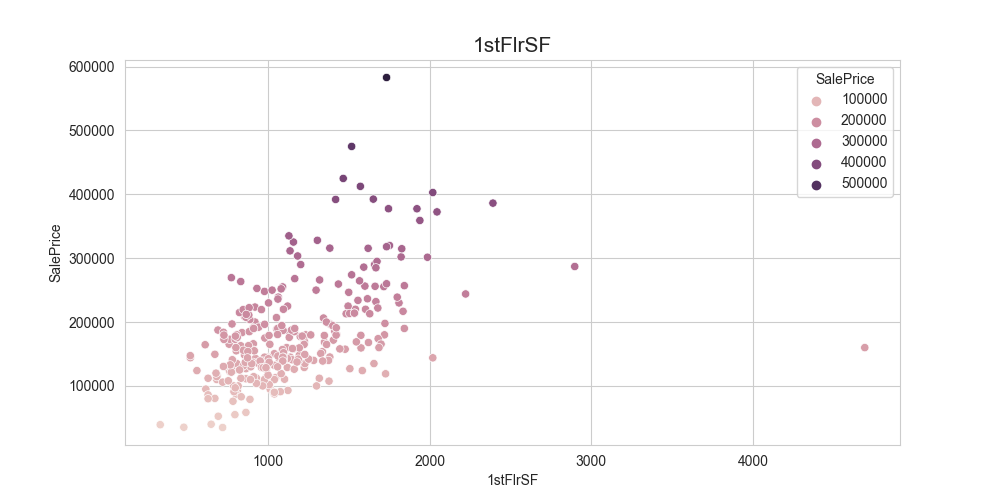

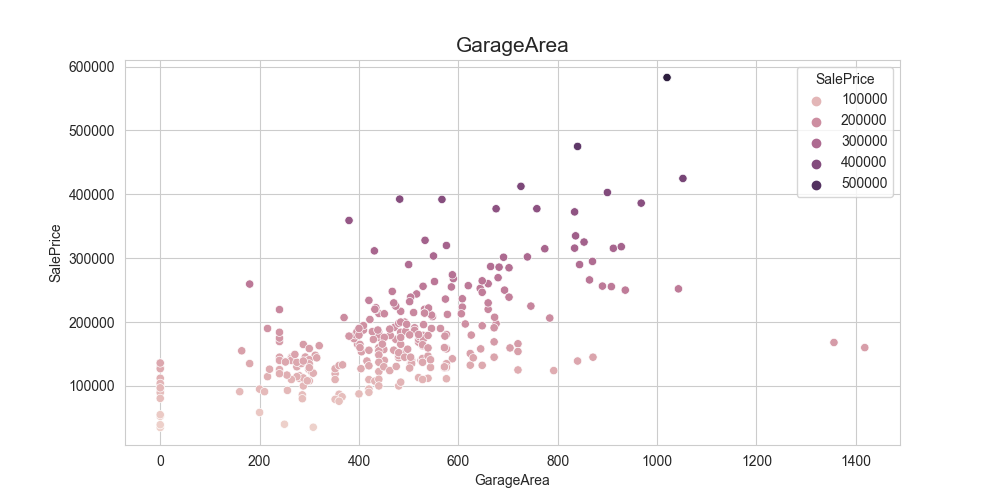

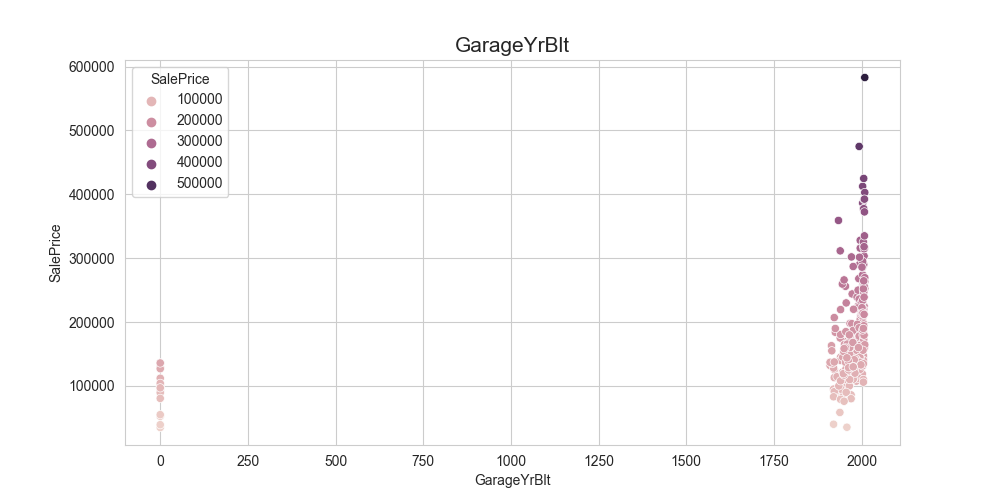

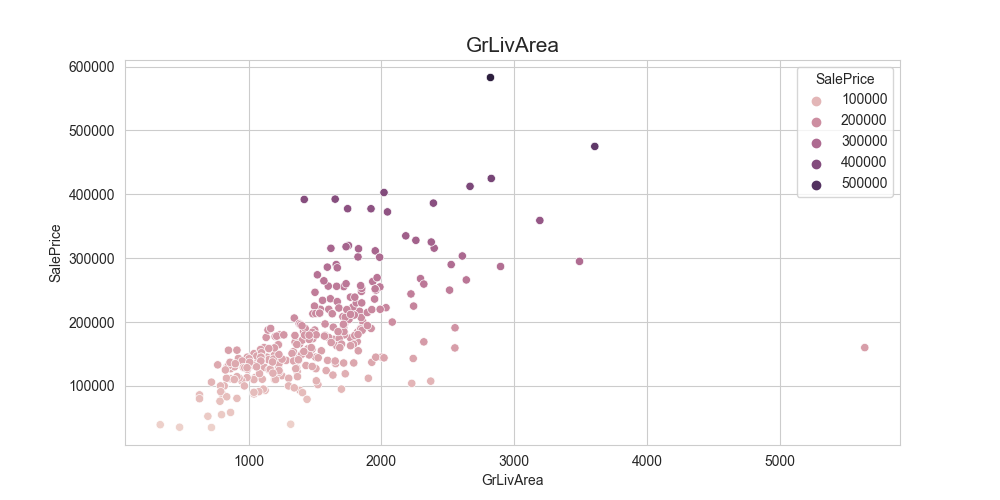

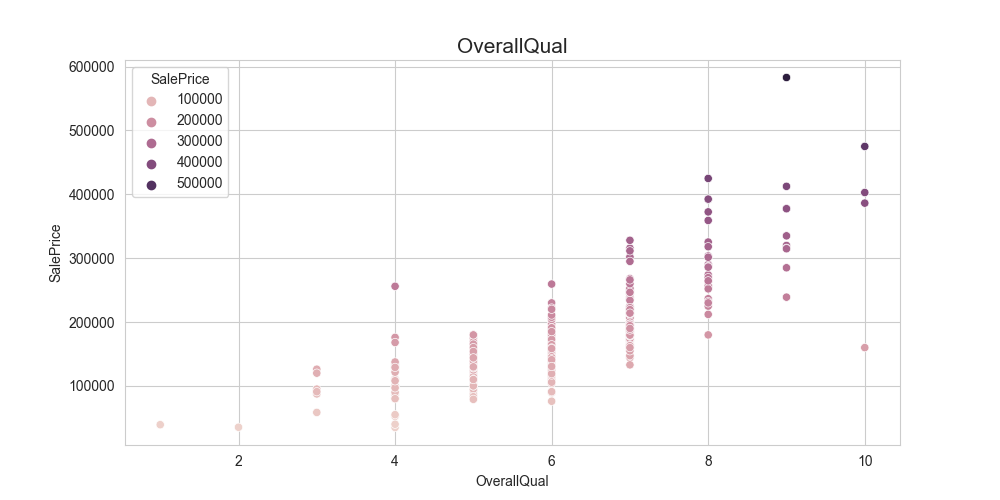

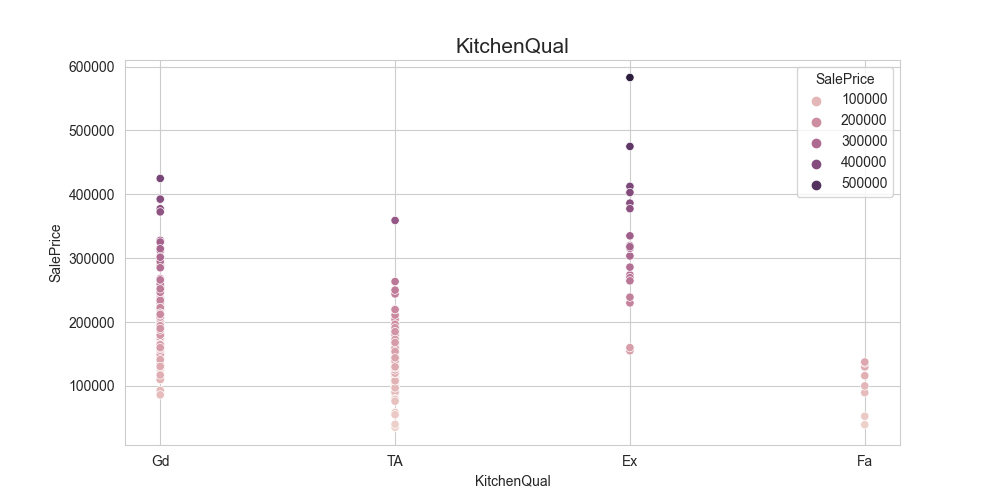

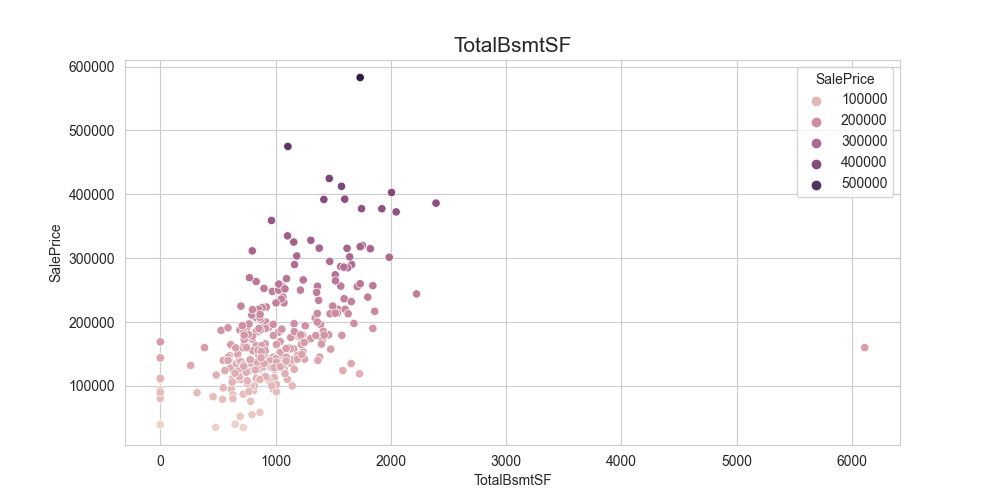

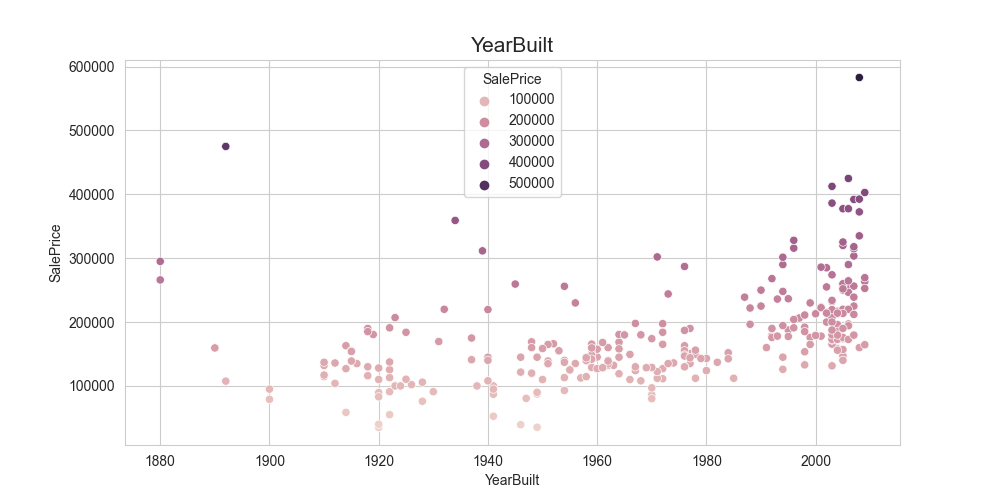

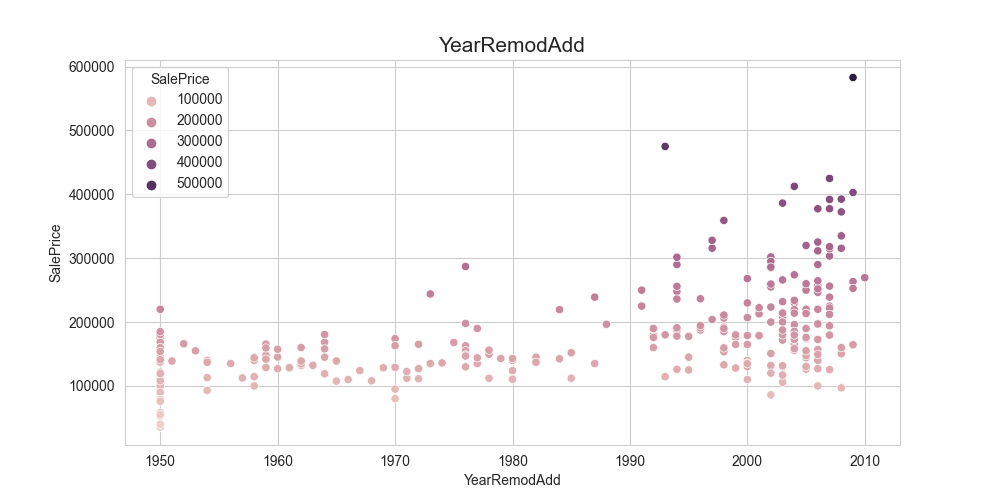

In [14]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
sns.set_style('whitegrid')
# print(col)
#print(target_var)

def numerical_plot(df, col, target_var):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=col, y=target_var, hue=target_var)
    plt.title(f"{col}", fontsize=15, y=1.0)
    # plt.show()
    plt.savefig('numerical_plot.png')
    plt.close()


target_var = "SalePrice"
# f_var = "OverallQual"
for col in initial_vars_to_study:
    numerical_plot(df_eda, col, target_var)
    print("\n\n")
    plot_path = 'numerical_plot.png'
    numerical_image = Image(plot_path)
    display(numerical_image)






# Conclusions and next steps
## Correlation and exceptions review

The plots and correlations interpretation coverage.

* A higher SalePrice is typically associated with the First Floor square feet having a larger surface area **['1stFlrSF']**.

* A higher SalePrice is typically associated with a higher quality kitchen **['KitchenQual']**.

* A higher SalePrice is typically associated with a larger Size of garage in square feet **['GarageArea']**.
* A higher SalePrice is typically associated with later years of the garage having been built **['GarageYrBlt']**.
    *GarageYrBlt* cannot accurately reflect correlations due to the presence of 0 values in the dataset. These 0 values likely indicate that no garage was built for those houses. One approach to address this is to impute the missing values with the average value of the variable excluding the zeros. However, the final recommendation is to drop the feature entirely, as the high correlation with YearBuilt suggests it doesn't add significant value to the dataset.
* A higher SalePrice is typically associated with a larger Above grade (ground) living area in square feet **['GrLivArea']**.
* A higher SalePrice is typically associated with a higher Rate of the overall material and finish of the house **['OverallQual']**.
* A higher SalePrice is typically associated with a greater total square feet of the basement area **['TotalBsmtSF']**.

    The *TotalBsmtSF* variable contains an outlier with a value exceeding 6000 square feet. Such extreme values can skew the analysis and potentially mislead the model's predictions. It is crucial to address these outliers by either capping them at a reasonable threshold or by transforming the variable to reduce the impact of these anomalies. Handling outliers effectively ensures a more robust and reliable model, ultimately leading to more accurate predictions and insights.
* A higher SalePrice is typically associated with more recent years of construction **['YearBuilt']**. 

* A higher SalePrice is typically associated with more recent years of remodeling **['YearRemodAdd']**. 

    *YearRemodAdd* exhibits a very weak overall correlation with SalePrice. For properties remodeled before 1990, the sale prices do not vary significantly with the year of remodeling. However, for properties remodeled after 1990, there is a noticeable correlation where more recent remodels tend to be associated with higher sale prices. This suggests that while the remodeling year before 1990 does not substantially impact the property's value, more recent renovations can enhance the market value, reflecting modern updates and improvements.

## Selection of variables to study
### GarageYrBlt: 

* The presence of zero values, likely indicating no garage, complicates correlation analysis. I considered imputing zero values with the average year of construction for properties with garages. However, in the end I decided dropping this variable due to its high correlation with YearBuilt, already included in the selection, as it might not add significant value to the dataset.

### Final selection of variables

**1stFlrSF (First Floor Square Feet)**

**GarageArea (Garage Area)**

**GrLivArea (Above Grade Living Area Square Feet)**
 
    This appears to be one of the most critical features for determining house value, as larger living areas above ground are generally more desirable and command higher prices.

**OverallQual (Overall Quality)**

    Higher quality ratings highly correlate with higher sale prices. This variable is very important for our predictive modeling as it encapsulates the general quality of the property.

**KitchenQual (Kitchen Quality)**

    High-quality kitchens are a significant selling point in homes and tend to increase property value. This variable is essential for understanding the appeal and marketability of the property.

**TotalBsmtSF (Total Basement Square Feet)**
 
    Larger basements are often valued highly, especially if finished. Note that outliers, such as basements larger than 6000 square feet, need careful handling as they can distort the overall analysis.

**YearBuilt (Year Built)**

    Older homes might have historical value, while newer homes may feature modern construction standards. It is essential to analyze how the age of the house affects its sale price.

**YearRemodAdd (Year Remodeled or Added)**

    Overall, this variable has a weak correlation with sale price. Before 1990, sale prices do not show significant variation with the remodeling year. However, for houses remodeled after 1990, there is some correlation, with more recent remodels often resulting in higher sale prices, indicating that modern updates add value.

    Recommendations
    I decided at this point to keep this variable given that we may be able to extract value from the data. 


In [82]:
final_vars_to_study = {'1stFlrSF', 'GarageArea', 'KitchenQual', 
'GrLivArea', 'OverallQual', 'TotalBsmtSF',
'YearBuilt', 'YearRemodAdd'}
final_vars_to_study

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}